Intermiediate (level 2) Task 2: Classification with Logistic Regression

Description: Build a decision tree classifier to predict a categorical outcome (e.g., predict species of flowers)

--- 1. Loading the Iris Dataset from CSV ---
Columns after initial load: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows of features (X):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

First 5 rows of target (y):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4

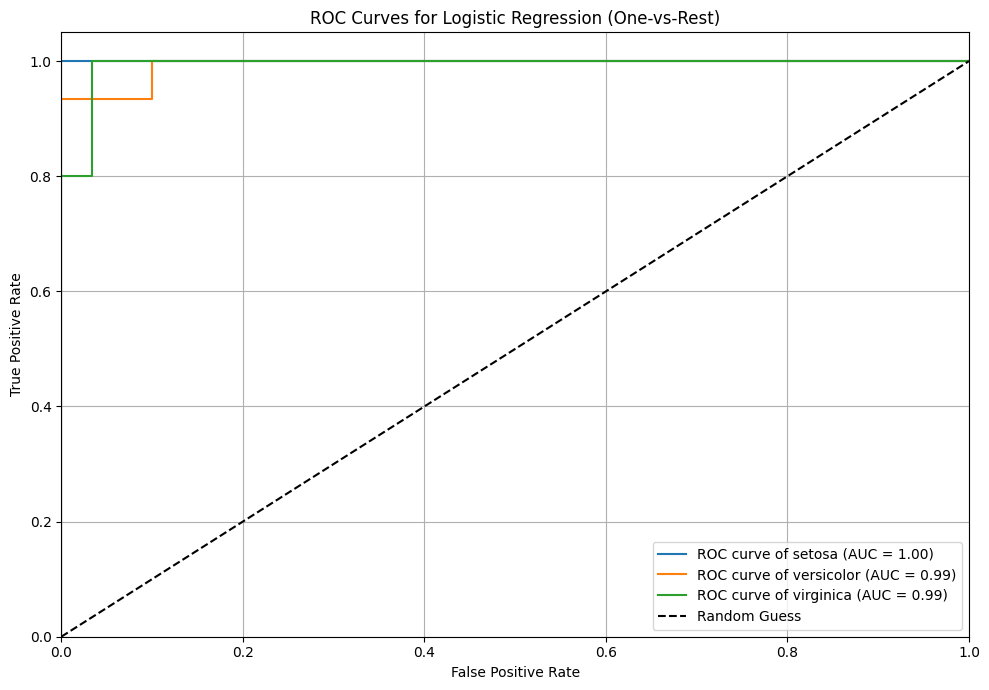


--- 4. Comparing with Other Classifiers (Random Forest and SVM) ---

Training and Evaluating Random Forest Classifier...

Random Forest Evaluation:
Accuracy: 0.8889
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Training and Evaluating SVM Classifier...

SVM Evaluation:
Accuracy: 0.9111
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
we

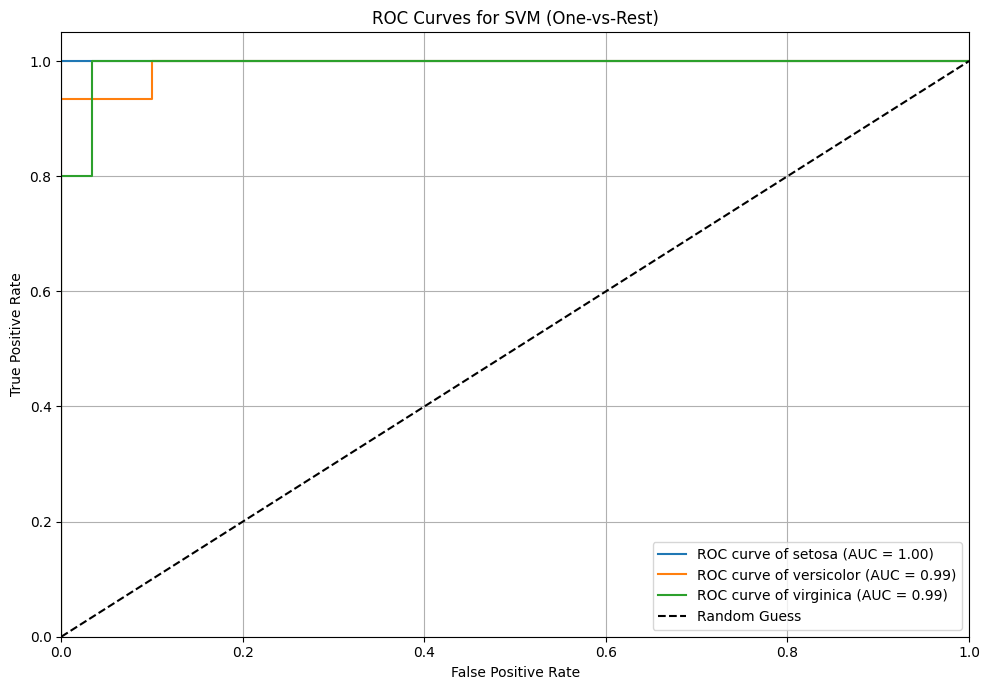


--- Comparison Summary (Accuracy) ---
Logistic Regression Accuracy: 0.9111
Random Forest Accuracy:     0.8889
SVM Accuracy:               0.9111


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import load_iris # We will not use this as we're loading from CSV

# --- 1. Load the Dataset ---
print("--- 1. Loading the Iris Dataset from CSV ---")

# Define the path to your CSV file
# IMPORTANT: Make sure 'iris.csv' is in the same directory as your script,
# or provide the full correct path like '/Users/youruser/Documents/iris.csv'
csv_file_path = '/content/1) iris.csv'
# If you are in Google Colab and uploaded it as '1) iris.csv', you might use:
# csv_file_path = '/content/1) iris.csv'
# However, renaming it to 'iris.csv' is highly recommended for clarity and avoiding issues.

try:
    # Load the CSV file.
    # If your CSV file HAS a header row (which is likely the cause of your error):
    df = pd.read_csv(csv_file_path) # NO header=None here

    # If your CSV file DOES NOT have a header (less common for public Iris CSVs with headers):
    # df = pd.read_csv(csv_file_path, header=None)
    # df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

    print(f"Columns after initial load: {df.columns.tolist()}")

    # Determine the name of the species column.
    # It could be 'species', 'class', or similar, depending on your CSV file.
    # Let's try common names and handle it gracefully.
    possible_species_cols = ['species', 'class', 'Species', 'Class', 'Name', 'variety']
    species_col = None
    for col in possible_species_cols:
        if col in df.columns:
            species_col = col
            break

    if species_col is None:
        raise ValueError("Could not find a 'species' or similar column in the CSV. "
                         "Please check your CSV file's column names.")

    # Separate features (X) and target (y)
    X = df.drop(species_col, axis=1) # All columns except the identified species column are features
    y_raw = df[species_col]          # The identified species column is our target

    # Map string species names to numerical labels (0, 1, 2)
    # This is crucial because ML models work with numerical data
    # Create a mapping for species names to integers
    # This ensures consistency in mapping (e.g., Setosa is always 0)
    unique_species = y_raw.unique()
    species_mapping = {name: i for i, name in enumerate(sorted(unique_species))}
    y = y_raw.map(species_mapping)

    # Define target names for evaluation reports (for clarity)
    # This ensures the order matches the numerical mapping (0, 1, 2)
    target_names = [name for name, i in sorted(species_mapping.items(), key=lambda item: item[1])]

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please make sure the 'iris.csv' file is in the correct directory.")
    print("Download link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
    print("If you downloaded from this link, please save the file as 'iris.csv'.")
    print("If your CSV has a header, ensure 'header=None' is NOT used in pd.read_csv().")
    exit() # Exit the script if the file isn't found
except ValueError as ve:
    print(f"Data Error: {ve}")
    print("This might be due to incorrect column names, missing species column, or non-numeric data in feature columns.")
    print("Please inspect your CSV file and the 'df.columns' output.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading or processing the CSV: {e}")
    exit()

# Display the first few rows and basic info
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())
print("\nDataset Info:")
X.info() # This will show the data types. Look for 'object' types here for features.
print("\nTarget Species Mapping:")
print(species_mapping) # Print the actual mapping used
print(f"Target Names for reports: {target_names}")


# --- 2. Preprocess the Data (Feature Scaling) ---
print("\n--- 2. Preprocessing the Data (Feature Scaling) ---")
# The Iris dataset features are already numerical, so we primarily need scaling.
# No categorical features to handle directly in this specific dataset.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # This line should now work correctly
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame, using original column names

print("\nFirst 5 rows of scaled features (X_scaled):")
print(X_scaled.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target classes is the same in train and test sets

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Distribution of target in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Distribution of target in testing set:\n{y_test.value_counts(normalize=True)}")


# --- 3. Train and Evaluate Logistic Regression Model ---
print("\n--- 3. Training and Evaluating Logistic Regression Model ---")
logistic_model = LogisticRegression(max_iter=200, random_state=42) # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test) # Probabilities for ROC curve (multi-class)

print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
# Use the dynamically created target_names
print("Classification Report:\n", classification_report(y_test, y_pred_logistic, target_names=target_names))

# For multi-class classification, ROC curve is usually plotted for each class (One-vs-Rest)
# Let's plot ROC curves for each class for Logistic Regression
plt.figure(figsize=(10, 7))
for i, species_name in enumerate(target_names): # Use target_names here
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_logistic[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of {species_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Compare with Other Classifiers (Random Forest and SVM) ---
print("\n--- 4. Comparing with Other Classifiers (Random Forest and SVM) ---")

# Random Forest Classifier
print("\nTraining and Evaluating Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names)) # Use target_names

# Support Vector Machine (SVM) Classifier
print("\nTraining and Evaluating SVM Classifier...")
svm_model = SVC(probability=True, random_state=42) # probability=True for ROC curve
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

print("\nSVM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names)) # Use target_names

# Plot ROC curves for SVM
plt.figure(figsize=(10, 7))
for i, species_name in enumerate(target_names): # Use target_names here
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of {species_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Comparison Summary (Accuracy) ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Random Forest Accuracy:     {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"SVM Accuracy:               {accuracy_score(y_test, y_pred_svm):.4f}")